## Solución parcial #4.

### **Punto número 4**

4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10
segundos de la señal usando Colab.

x(t)= 4∗cos(80πt + (π /4))+ k ∗ sen(40πt)+ 5 Con k = 20

### **Punto número 7**

7. Una señal fisiológica definida en el rango entre a Hz y b Hz se toma con frecuencia de muestreo
de 100 Hz. Para esta señal:

• Diseñar el filtro pasa-altas teniendo en cuenta que se requiere que en la banda de rechazo
la señal de salida sea por lo menos 10 veces menor en amplitud a la señal de entrada
(10%).

• Diseñar el filtro pasa-bajas teniendo en cuenta que se requiere que en la banda de rechazo
la señal de salida sea por lo menos 100 veces menor en amplitud a la señal de entrada
(10%).

**Diseño filtro pasa-altas**

Como se nos pide que en la banda de rechazo la señal de salida sea por lo menos 10 veces menor en amplitud a la señal de entrada, se hace el cálculo de la atenuación requerida.

Atenuación = 20log(Ain/Aout).
Atenuación = 20log(1/10) = -20 dB. Por lo tanto, una ventana rectangular sería adecuada para este caso.

El ancho de banda de transición normalizada es de 0.9 Hz.

La frecuencia de corte normalizada a emplear se calcula de la manera explicada teóricamente. fc normalizada = fc/Fs = 5 Hz / 100 Hz.

Para hallar el orden sería m = delta F/ (delta f/Fs).

Como no se especifica el ancho de banda de transición, se tomará un valor arbitrario, pensando en que el filtro diseñado funcione de manera óptima. Para ello, se elegirá un ancho de banda de transición de 10 Hz.

De este modo, el orden es igual a 91.

**Diseño filtro pasa-bajas**

Atenuación = 20log(Ain/Aout).
Atenuación = 20log(1/100) = -40 dB. Por lo tanto, una ventana Hanning. sería adecuada para este caso.

El ancho de banda de transición normalizada es de 0.9 Hz.

La frecuencia de corte normalizada a emplear se calcula de la manera explicada teóricamente. fc normalizada = fc/Fs = 5 Hz / 100 Hz.

Para hallar el orden sería m = delta F/ (delta f/Fs).

Como no se especifica el ancho de banda de transición, se tomará un valor arbitrario, pensando en que el filtro diseñado funcione de manera óptima. Para ello, se elegirá un ancho de banda de transición de 10 Hz.

De este modo, el orden es igual a 33. 

In [132]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import welch, firwin, filtfilt
from scipy import signal

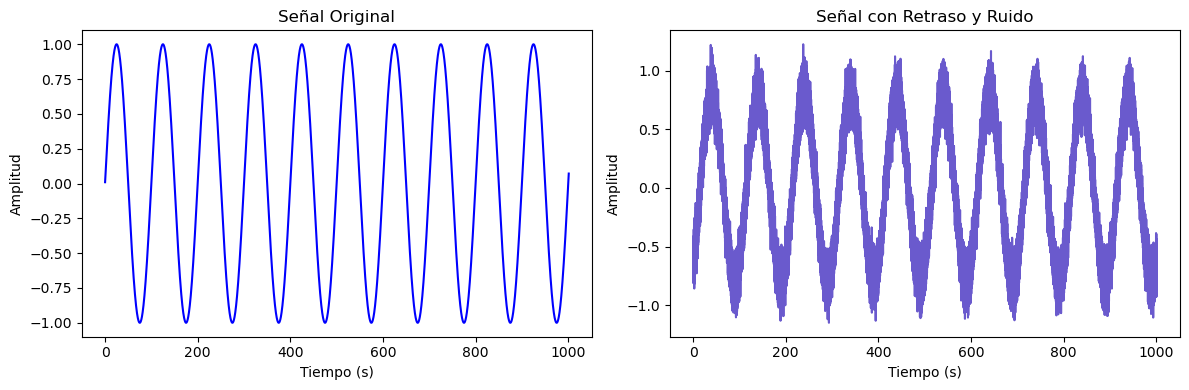

In [134]:
Fo = 0.01 
Fs = 100 
n = np.arange(0,1001, 1/Fs)
Xe = np.sin(2*(np.pi)*Fo*(n+15/Fs)) # Señal biológica original.

# Creando la señal Ye(n) (retraso y atenuación de Xe)
alpha = 0.8 # Atenuación dado por el viaje de la señal Xe a través de diversos tejidos
D = 15 # Retardo induciodo por el viaje de la señal Xe a través de diversos tejidos

# Para el ruido Gaussiano
media = 0;
varianza = 0.01
std = np.sqrt(varianza)
w = np.random.normal(loc=media, scale=std, size=len(n)) #Secuencia de ruido gaussiano.

# Obteniendo la señal final de la forma: y_e (n)=α*Xe(n-D)+w(n)

Xe_Retardo = np.sin(2*(np.pi)*Fo*(n-D)) # Señal Xe retrasada en D muestras
Ye = alpha*Xe_Retardo + w

# Graficando las señales Xe(n, Ye(n) y el W
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(n, Xe, color="blue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal Original")

plt.subplot(1, 2, 2)
plt.plot(n, Ye, color="slateblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal con Retraso y Ruido")

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

In [135]:
order_FIR = 90 # orden calculado segun requerimientos
fc = 0.05 
highpass = signal.firwin(order_FIR+1,fc, pass_zero = 'highpass',window='rectangular') #filtro
FIR_highpass = signal.filtfilt(b=highpass,a=1,x=Ye) # aplicación del filtro

In [136]:
order_FIR = 30 
fc = 0.5 #frecuencia normalizada con la teoría trabajada en clase
lowpass = signal.firwin(order_FIR+1,fc, pass_zero = 'lowpass',window='hann') #filtro
FIR_lowpass = signal.filtfilt(b=lowpass,a=1,x=Ye) # aplicación del filtro

**Diagramas de magnitud y fase**

In [138]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(20,4));
    plt.subplot(131);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();
    plt.grid(True);

    plt.subplot(132);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(133);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Diagrama de magnitud y fase filtro pasa altas**

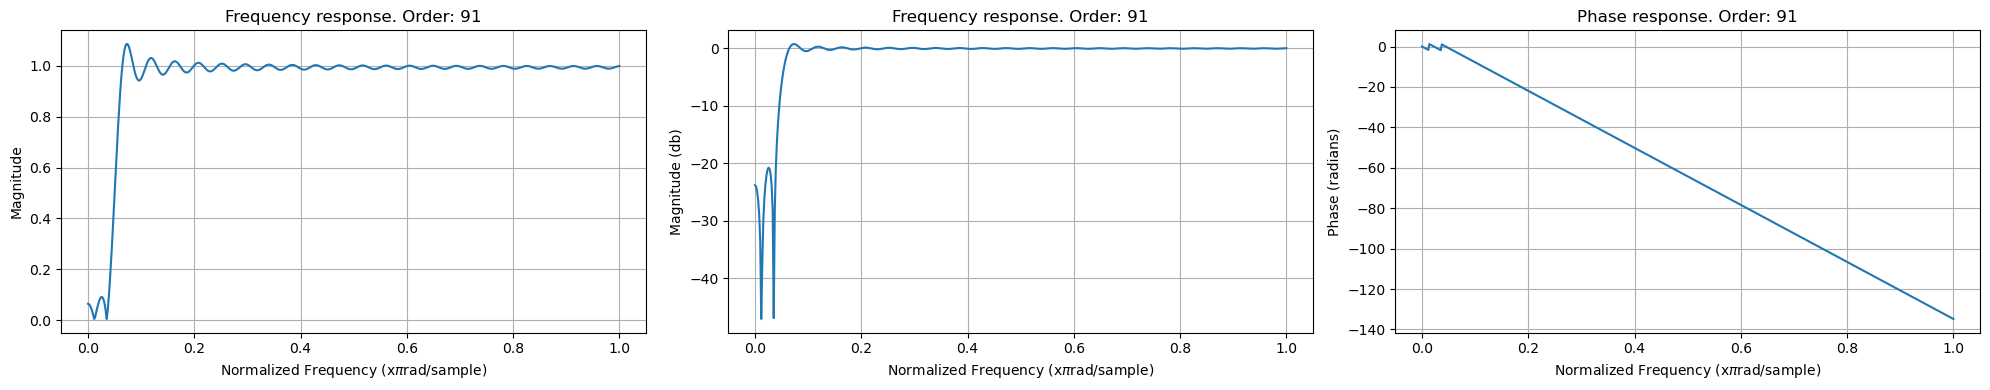

In [140]:
mfreqz(highpass, 1, 91) #FIR pasa bajas

**Diagrama de magnitud y fase filtro pasa bajas**

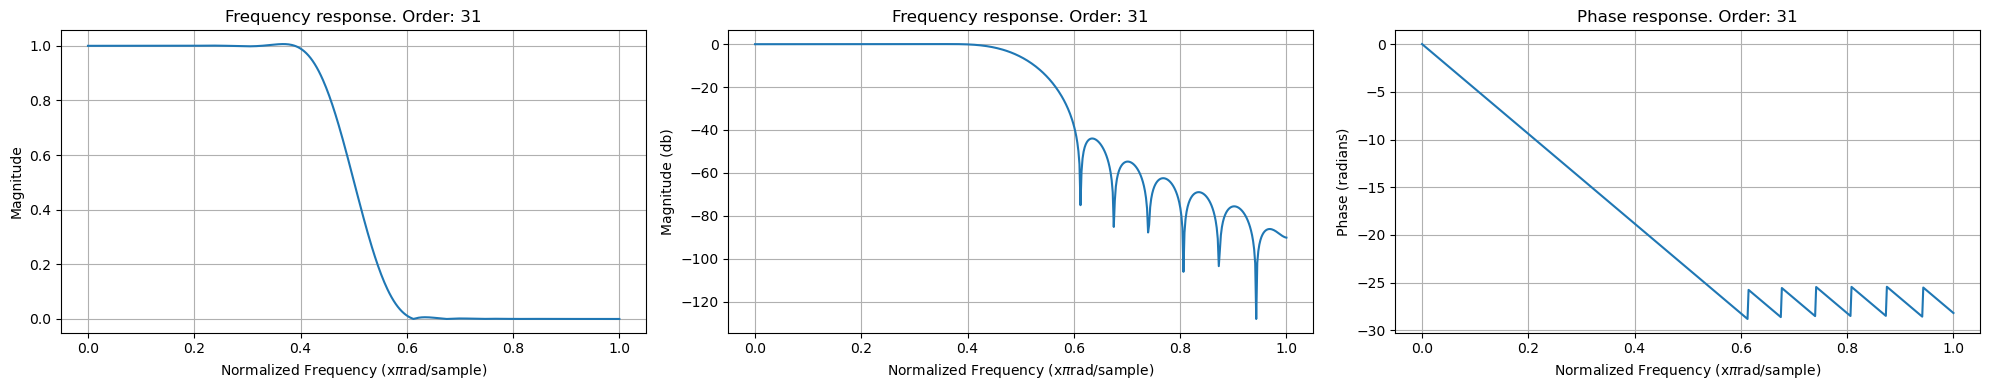

In [146]:
mfreqz(lowpass, 1, 31) #FIR pasa bajas